In [1]:
#menghubungkan colab dengan gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#memanggil dataset lewat gdrive
path = "/content/drive/MyDrive/praktikum/praktikum05"

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv (path + "/data/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
# Preprocessing Data
# Encode kolom target 'Species'
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

print("\nLabel Encoding Species:")
print(dict(zip(le.classes_, le.transform(le.classes_))))


Label Encoding Species:
{'Iris-setosa': np.int64(0), 'Iris-versicolor': np.int64(1), 'Iris-virginica': np.int64(2)}


In [10]:
# Pisahkan Fitur dan Target
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

In [11]:
# Split Data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nJumlah Data Training:", len(X_train))
print("Jumlah Data Testing:", len(X_test))


Jumlah Data Training: 120
Jumlah Data Testing: 30


In [12]:
# Buat Model Decision Tree
model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [13]:
# Prediksi Data Testing
y_pred = model.predict(X_test)

In [16]:
# Evaluasi Model
akurasi = accuracy_score(y_test, y_pred)
print("\nAkurasi Model:", round(akurasi * 100, 2), "%")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Akurasi Model: 100.0 %

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



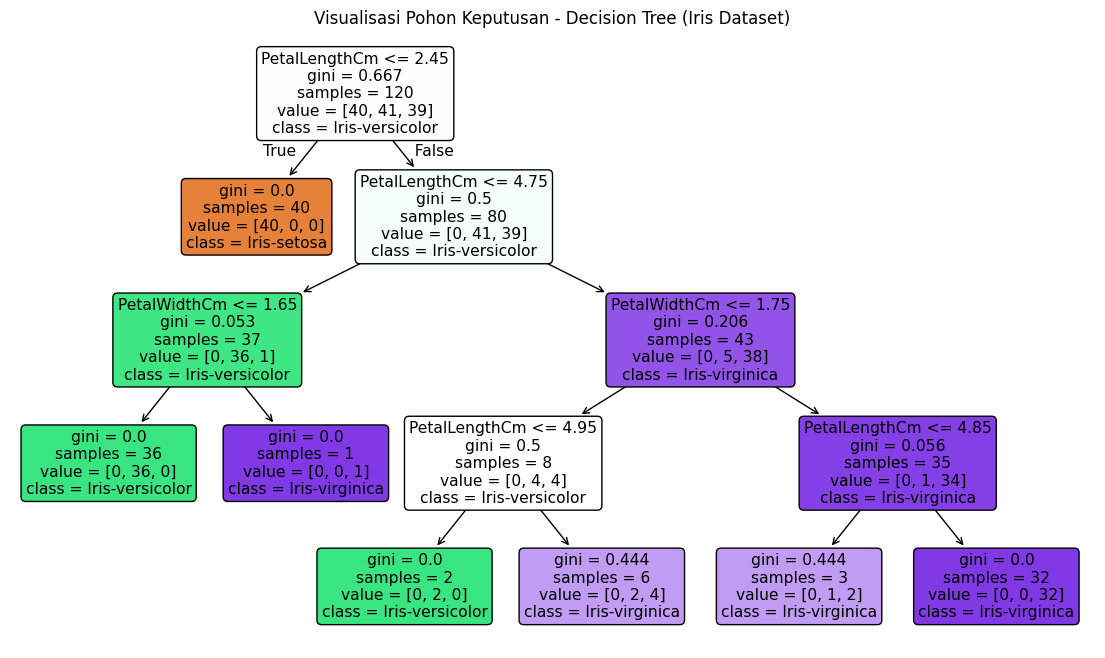

In [17]:
# Visualisasi Pohon Keputusan
plt.figure(figsize=(14, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=le.classes_, rounded=True)
plt.title("Visualisasi Pohon Keputusan - Decision Tree (Iris Dataset)")
plt.show()

In [18]:
# Uji Prediksi Data Baru
data_baru = pd.DataFrame({
    'SepalLengthCm': [5.2],
    'SepalWidthCm': [3.6],
    'PetalLengthCm': [1.4],
    'PetalWidthCm': [0.2]
})

prediksi = model.predict(data_baru)
hasil = le.inverse_transform(prediksi)
print("\nHasil Prediksi Data Baru:", hasil[0])


Hasil Prediksi Data Baru: Iris-setosa
